# Building Forcasting Models

Dataset: https://www.kaggle.com/datasets/sumanthvrao/daily-climate-time-series-data

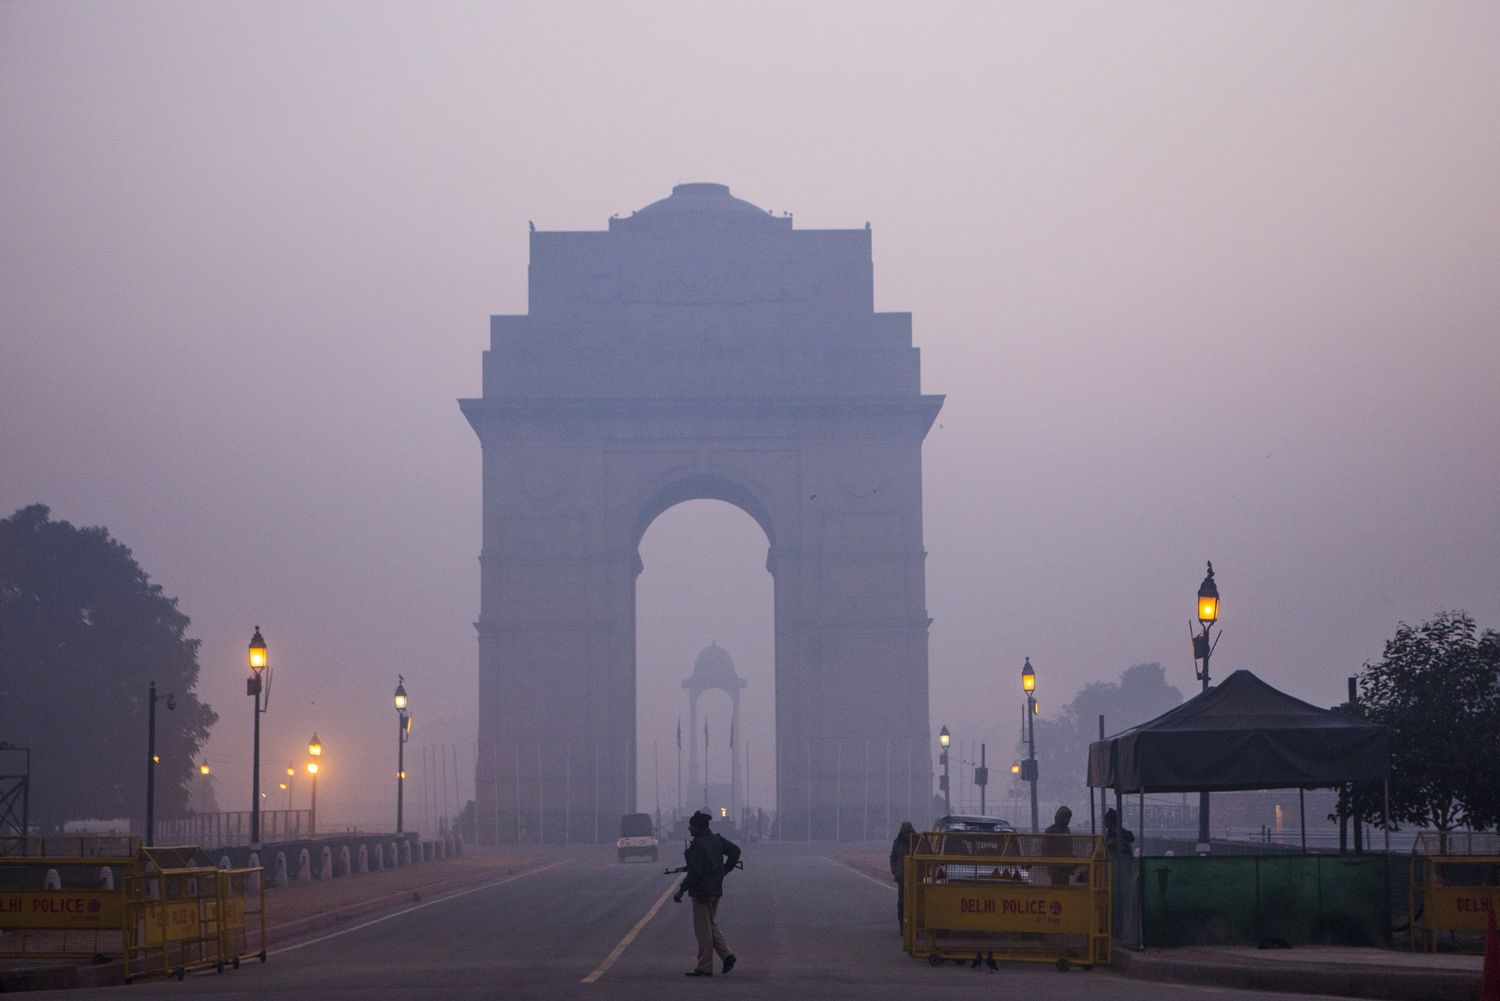

Before jumping into the proccess I would like to tell you about the changes I made in the dataset



1.   The Original Data set contained 4 columns along with date namely: meantemp, humidity, wind_speed and mean_pressure
2.   For the purpose of this assignment, I converted this dataset into univariate hence kept meantemp and removed other columns
3.  Peformed those changes in Excel



In [3]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [4]:
delhi = pd.read_csv("/content/DelhiClimateMeanTemp.csv",
                    header = 0, index_col = 0,
                    parse_dates = True,
                    squeeze = True)

<ipython-input-4-97eda2c785da>:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  delhi = pd.read_csv("/content/DelhiClimateMeanTemp.csv",
<ipython-input-4-97eda2c785da>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  delhi = pd.read_csv("/content/DelhiClimateMeanTemp.csv",


In [5]:
delhi.head()

date
2013-01-01    10.000000
2013-02-01     7.400000
2013-03-01     7.166667
2013-04-01     8.666667
2013-05-01     6.000000
Name: meantemp, dtype: float64

In [6]:
delhi.describe()

count    1462.000000
mean       25.495521
std         7.348103
min         6.000000
25%        18.857143
50%        27.714286
75%        31.305804
max        38.714286
Name: meantemp, dtype: float64

## Moving Average Forcasing

In [7]:
ma_forcast = pd.DataFrame(delhi)
ma_forcast.head()

,meantemp
date,
2013-01-01,10.000000
2013-02-01,7.400000
2013-03-01,7.166667
2013-04-01,8.666667
2013-05-01,6.000000


In [33]:
# determining window size
window = 2

In [34]:
# calculating moving average
ma_forcast['MovingAverage'] = ma_forcast['meantemp'].rolling(window = window).mean()
ma_forcast.head(10)

,meantemp,MovingAverage
date,,
2013-01-01,10.000000,NaN
2013-02-01,7.400000,8.700000
2013-03-01,7.166667,7.283333
2013-04-01,8.666667,7.916667
2013-05-01,6.000000,7.333333
2013-06-01,7.000000,6.500000
2013-07-01,7.000000,7.000000
2013-08-01,8.857143,7.928571
2013-09-01,14.000000,11.428571


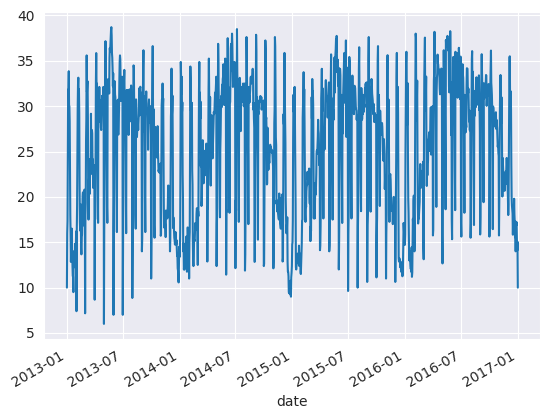

<Figure size 1000x600 with 0 Axes>

In [35]:
# visualisng the original data and moving average
ma_forcast['meantemp'].plot()
plt.figure(figsize = (10,6));

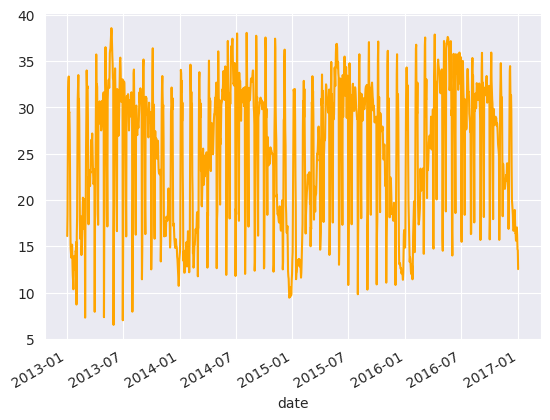

<Figure size 1000x600 with 0 Axes>

In [36]:
ma_forcast['MovingAverage'].plot(color = 'orange')
plt.figure(figsize = (10,6));

# Linear Regression Forcasting

In [11]:
# importing libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [12]:
#creating empty
lr_forcast = pd.DataFrame(delhi)

#creating lagged features
lr_forcast['lag1'] = lr_forcast['meantemp'].shift(1)
lr_forcast['lag2'] = lr_forcast['meantemp'].shift(2)

In [13]:
# drop rows with nan values due to lagged features
lr_forcast.dropna(inplace = True)

In [14]:
# splitting data into features and target
features = lr_forcast[['lag1','lag2']]
target = lr_forcast['meantemp']

In [15]:
# spliting into train and test sets
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2,shuffle = False)

In [16]:
# create a linear regression model
model = LinearRegression()

# train the model on the training data
model.fit(features_train,target_train)

LinearRegression()

In [39]:
# making prediction on the test set
predictions = model.predict(features_test)

In [18]:
# calculate mean squared error
mse = mean_squared_error(target_test, predictions)
mse

2.7755661800456535

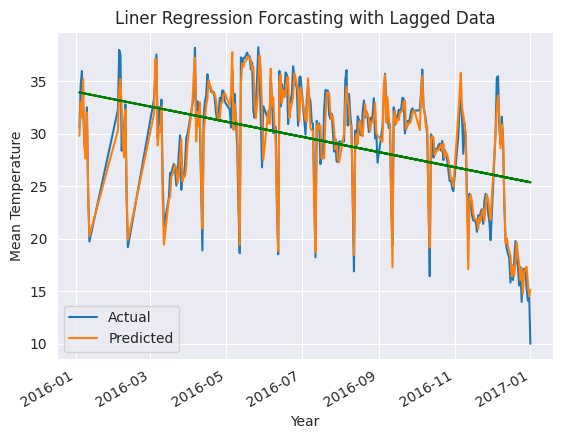

In [37]:
# visualisation prediction
pred_df = pd.DataFrame({'Actual': target_test,'Predicted': predictions},
                       index = features_test.index)
pred_df.plot();
plt.xlabel("Year")
plt.ylabel("Mean Temperature")
plt.title("Liner Regression Forcasting with Lagged Data")

trend = np.polyfit(pred_df.index.astype(int), pred_df['Predicted'], 1)
trendline = np.polyval(trend, pred_df.index.astype(int))
plt.plot(pred_df.index, trendline, color='green', label='Trendline')

plt.show()